### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1. Problem Statement

The problem is to predict whether a machine will fail or not as **No Failure** and the type of failure that will occur as **Heat Dissipation Failure** or **Power Failure** or **Overstrain Failure** or **Tool Wear Failure** or **Random Failures**.

Important : There are two Target vriables
- Target : Failure or Not
- Failure Type : Type of Failure

#### 2. Data Collection

### 2.1 Import the required packages and Load the data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the data
data_path = '/mnt/d/ml_projects/maintenance/notebook/data/predictive_maintenance.csv'
df = pd.read_csv(data_path)
df

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/ml_projects/maintenance/notebook/data/predictive_maintenance.csv'

In [ ]:
# Drop ID columns
df.drop(columns=['UDI','Product ID'], inplace=True)

#### Show Top 5 Records

In [ ]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


#### Shape of the dataset

In [ ]:
df.shape

(10000, 8)

#### 2.2 Dataset Information

- UID: A unique identifier for each data point, ranging from 1 to 10,000.

- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number.

- air temperature [K]: The surrounding air temperature in Kelvin, with variations within a small range around 300 K.

- process temperature [K]: The temperature of the machine's process, which is slightly higher than the air temperature.

- rotational speed [rpm]: The machine’s rotational speed in revolutions per minute.

- torque [Nm]: The torque applied to the machine’s motor, typically around 40 Nm.

- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. 

- Target: A binary label indicating whether the machine has failed (1) or not (0).

- Failure Type: A categorical label specifying the type of machine failure, if any.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check Data Imbalance of dependent variable
- Check various categories present in the different categorical column
- Identifying Numerical and Categorical Features

### 3.1 Check Missing values

In [ ]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


Visualizing Missing Values...


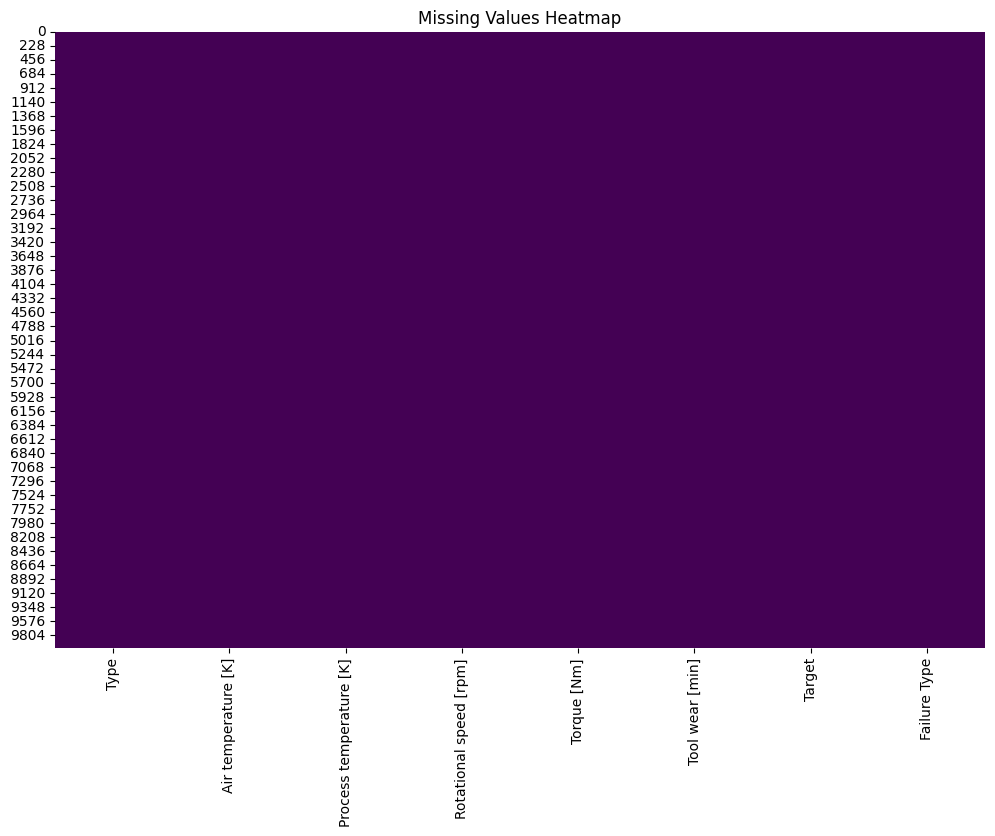

In [ ]:
# Visualization of Missing Values
print("\nVisualizing Missing Values...")
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [ ]:
# Check Null Count and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


### 3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Target                       2
Failure Type                 6
dtype: int64

### 3.5 Check statistics of data set

In [ ]:
# Summary Statistics (Numerical Features)
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# Summary Statistics (Categorical Features)
df.describe(include=["O"])

,Type,Failure Type
count,10000,10000
unique,3,6
top,L,No Failure
freq,6000,9652


### 3.6 Checking Data Imbalance of dependent variable

In [ ]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

The dependent variables are highly imbalanced. We will deal with that later on.



### Insights

#### **1. Data Types and Non-null Counts:**
- The dataset contains **10000 entries** and **8 columns**.
- **Data Types**: There are 3 columns with `float64` data type, 3 columns with `int64` data type, and 2 columns with `object` data type.
  - **Numerical Features**: These include features like `Air temperature [K]`, `Process temperature [k]`, `Rotational speed [rpm]`, etc.
  - **Categorical Features**: `Type` and `Failure Type`.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `Target` has a mean of **0.033900** which suggests that the data, on average, is centered around zero and a standard deviation of **0.180981**,  indicating a high spread.
  - `Air Temperature [k]` ranges from **295.5 [k] to 304.5 [k]**, with a mean of **300 [k]**, showing a relatively high temperature on average.
  - `Process Temperature [k]` ranges from **305.7 [k] to 310.8**, with a mean of **310 [k]**, showing a relatively high temperature on average.
  - `Rotational speed [rpm]` ranges from **1168 [rpm] to 2886 [rpm]**, with a mean of **1538 [rpm]**, indicating that the average rotational speed is closer to the lower end of the recorded range, which spans from 1168 rpm to 2886 rpm.
  - `Torque [Nm]` ranges from **3.8 [Nm] to 76.6 [Nm]** with a mean of **39.9 [Nm]**, indicating that the average torque is closer to the lower end of the recorded range, which spans from 33.2 Nm to 67.6 rpm.
  - `Tool wear [min]` ranges from **53 [min] to 253 [min]** with a mean of **63.6 [min]**, 


- **Categorical Features**:
  - **Type** has **3 unique values**, with `L` being the most common, suggesting that Low is the dominant type in the dataset.
  - **Failure Type** is mostly `No Failure` which appears 9652 times (96.52% of the data) with **6 unique failure types**, indicating that the Failure Type feature is highly imbalanced.

### **Issues to be Addressed Later**

1. **Imbalanced Data**:
   - `Failure Type` variable is highly imbalanced. we need to use resampling technique like SMOTE, undersampling or oversampling to solve this issue.

2. **Categorical Encoding**:
   - Categorical feature `Type` has many unique values. Decisions need to be made on how to encode `Type` (e.g., one-hot encoding, label encoding, or frequency encoding) based on its relationship with the target variables `Target` and `Failure Type` or drop this feature. 

3. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

#### 3.7 Check various categories present in the different categorical column

In [ ]:
print("Categories in 'Type' variable:     ",end=" " )
print(df['Type'].unique())

print("Categories in 'Failure Type' variable:  ",end=" ")
print(df['Failure Type'].unique())


Categories in 'Type' variable:      ['M' 'L' 'H']
Categories in 'Failure Type' variable:   ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


#### 3.8 Identifying Numerical and Categorical Features

In [ ]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

We have 2 categorical features : ['Type', 'Failure Type']


### 4. Exploring Data 

#### 4.1 Percentage of machines by Type

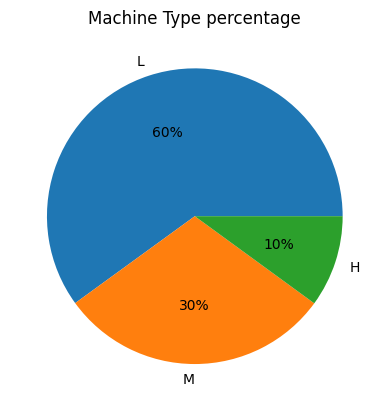

In [ ]:
# Pie chart of Machine Type percentage
value = df['Type'].value_counts()
Type_percentage = (value/df.Type.shape[0]) * 100
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, autopct='%.0f%%')
plt.title('Machine Type percentage')
plt.show()

#### 4.2 Anomaly detection

In [ ]:
# Create a list of features and targets
features = [col for col in df.columns if df[col].dtype=='float64' or col =='Type']
target=['Target', "Failure Type"]
# Portion of data where 'Failure Type' is 'Random Failures'
idx_RNF = df.loc[df['Failure Type']=='Random Failures'].index
df.loc[idx_RNF,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [ ]:
# Removing rows where Target = 0 (no failure) but Failure Type is 'Random Failures', since this is a contradiction and likely a data inconsistency.
df.drop(index=idx_RNF, inplace=True)

In [ ]:
# Removing rows where Target = 1 (failure) but no Failure Type is specified
idx= df.loc[(df['Target'] == 1) & (df['Failure Type'] == "No Failure")].index
display(df.loc[idx, ['Target', 'Failure Type']])
df.drop(index=idx, inplace=True)

,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


#### 4.3 Outliers inspection

In [ ]:
df.columns.dtype

dtype('O')

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


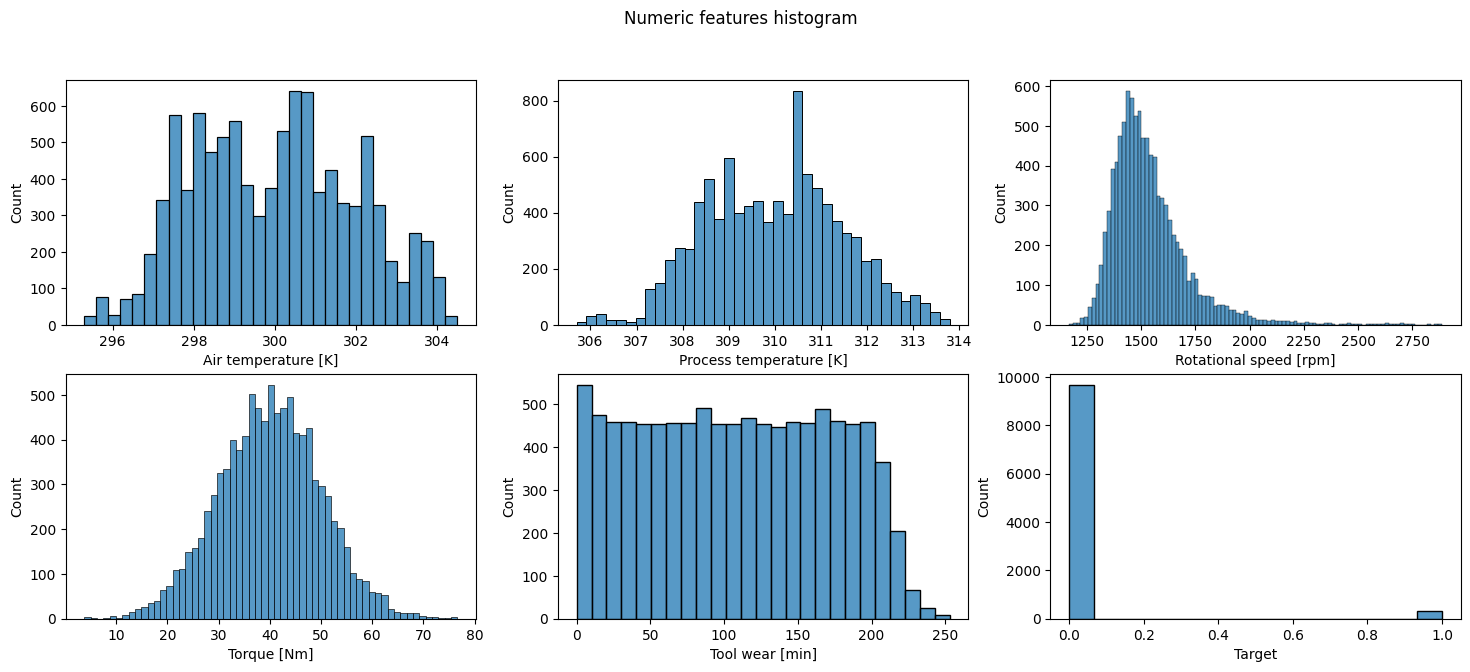

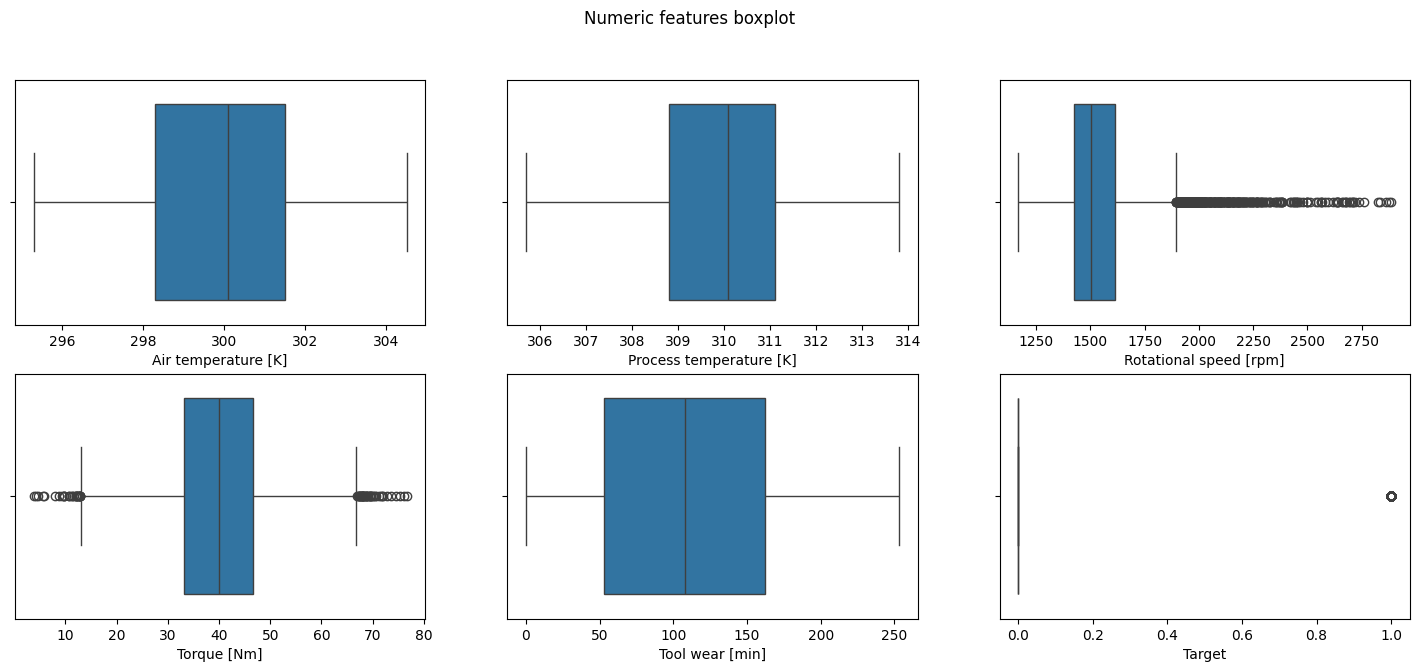

In [ ]:
num_features = [col for col in df.columns if df[col].dtype != 'O']
print(num_features)

# Histograms of numerical features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features histogram')
for j, feature in enumerate(num_features):
    sns.histplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

# boxplot of numerical features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

The boxplots indicate potential outliers in the features mentioned above. However, there are a few important considerations regarding specific features:

- **Torque**: The boxplot suggests potential outliers, but given the Gaussian distribution, using the **3σ rule** (based on standard deviation) might be more appropriate than relying on the IQR method used in boxplot-based outlier detection.

- **Rotational Speed**: The distribution is  **right-skewed**, so high values are likely valid and not outliers. But If it were **left-skewed**, low values might be outliers instead.

For now, we’ll retain the outliers and review them after further analysis.